In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd 

In [2]:
df = pd.read_csv("ABUL HASAN - diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','Age']
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
print(df.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                     0.627  0.483333        1  
1                     0.351  0.166667        0  
2                     0.672  0.183333        1  
3                     0.167  0.000000        0  
4                     2.288  0.200000        1  


In [5]:
X = df.drop(columns=['Outcome']) 
y = df['Outcome'] 

In [6]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.627,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.351,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.672,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.167,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,2.288,0.200000


In [ ]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

param_grid = {
    'max_depth': range(4, 20, 1),
    'min_samples_leaf': range(1, 40, 2),
    'min_samples_split': range(2, 40, 2),
    'criterion': ["entropy", "gini"]
}

tree = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid,cv=5, verbose=True)
grid_search.fit(X_train, y_train)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)


Fitting 5 folds for each of 19000 candidates, totalling 95000 fits
best accuracy 0.772741433021807
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=31,
                       random_state=1)


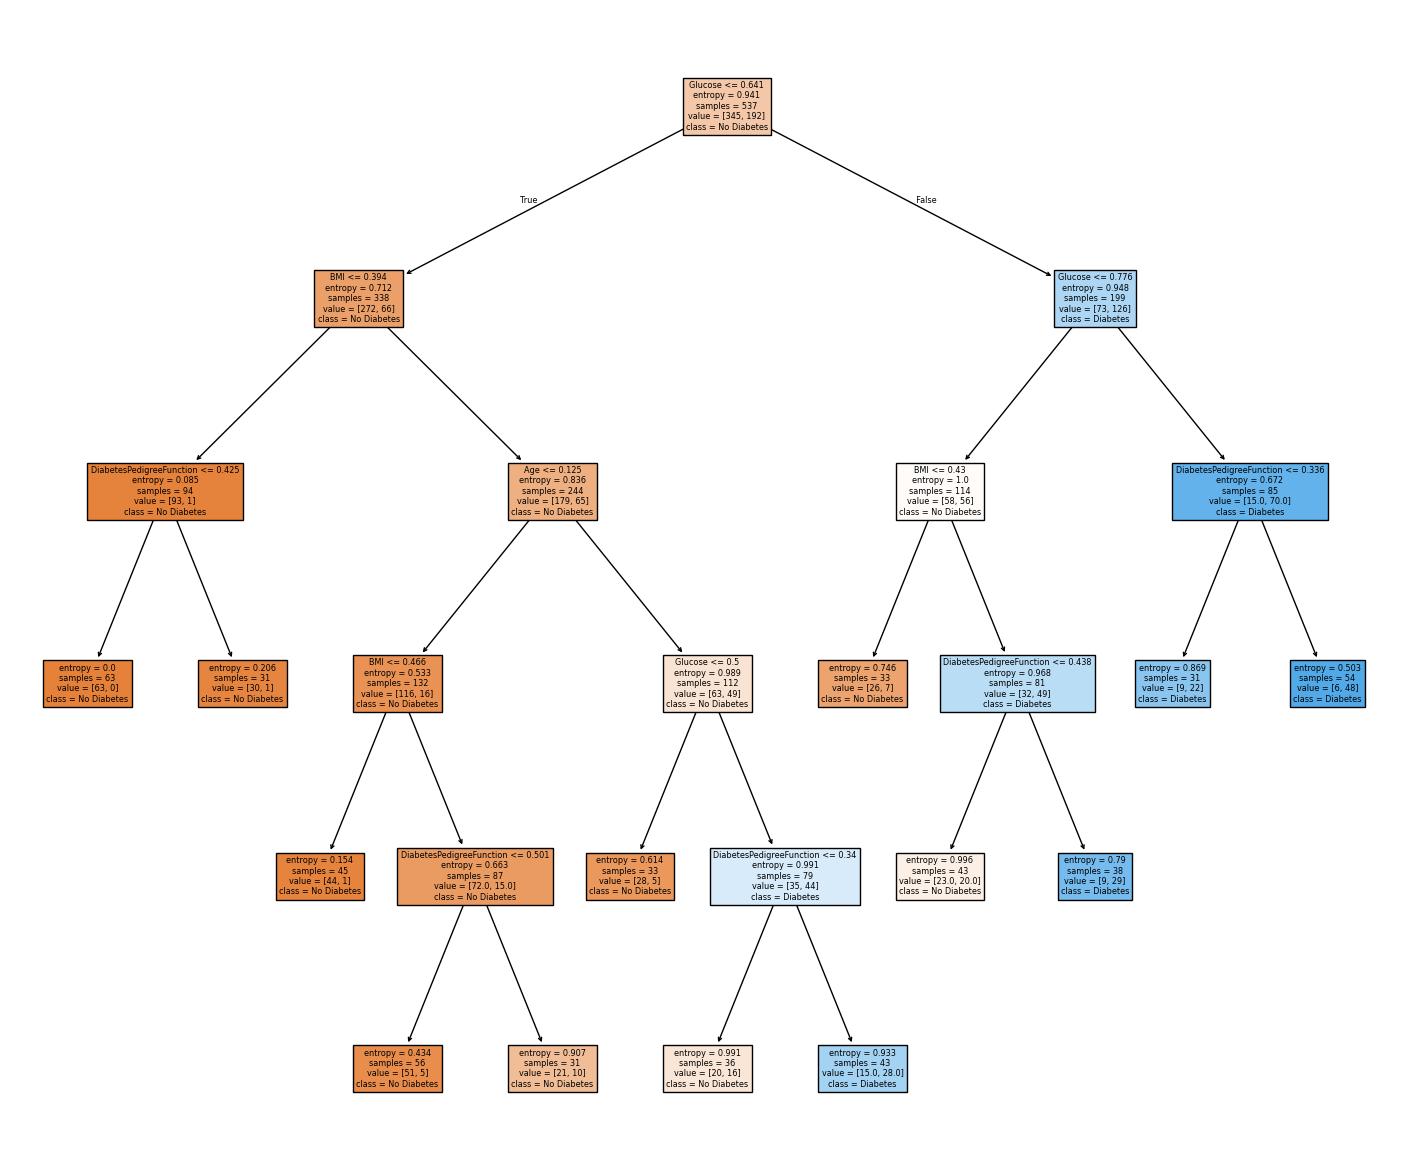

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
 
# Plot the best decision tree model
best_tree_clf = grid_search.best_estimator_

plt.figure(figsize=(18, 15))
plot_tree(best_tree_clf, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.show()